In [3]:
from google.colab import files
uploaded = files.upload()

Saving ADDRESS MASTER1.csv to ADDRESS MASTER1 (2).csv


In [0]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve, GridSearchCV 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import random
import io
from termcolor import colored

Datacsv = pd.read_csv(io.BytesIO(uploaded['ADDRESS MASTER.csv']),',',error_bad_lines=False, encoding = 'unicode_escape')
DataMaster = pd.DataFrame(Datacsv)

In [0]:
Datacsv = pd.read_csv(io.BytesIO(uploaded['ADDRESS MASTER1.csv']),',',error_bad_lines=False, encoding = 'unicode_escape')
Datadf = pd.DataFrame(Datacsv)
columns = Datadf.columns

In [0]:
def formatting(Datadf):
  data = pd.DataFrame()
  data['Attributes'] = Datadf.columns
  df = pd.DataFrame()
  df = Datadf.describe(include = 'all')
  df = df.transpose()
  dc = df['count']
  du = df['unique']
  dfr = df['freq']
  data['Count'] = 0
  data['Unique'] = 0
  data['Frequency'] = 0
  data['DataTypes'] = 0
  data['IsNull'] = 0
  data['IsNotNull'] = 0
  data['PercentageNull'] = 0
  for i in range(len(Datadf.columns)):
    data['Count'][i] = dc[i]
    data['Unique'][i] = du[i]
    data['Frequency'][i] = dfr[i]
  ddt = Datadf.dtypes
  disn = Datadf.isnull().sum()
  disnn = Datadf.shape[0] - Datadf.isnull().sum()
  dpnl = (Datadf.isnull().sum()/Datadf.shape[0]) * 100
  for i in range(len(Datadf.columns)):
    data['DataTypes'][i] = ddt[i]
    data['IsNull'][i] = disn[i] 
    data['IsNotNull'][i] = disnn[i] 
    data['PercentageNull'][i] = dpnl[i]

  import re
  count = 0
  count1 = 0
  count2 = 0
  c = []
  c1 = []
  c2 = []
  data['Entire_Upper'] = 0
  data['Entire_Lower'] = 0
  for column in Datadf.columns:
    for i in range(len(Datadf)):
      if(str(Datadf[column][i]).isupper()):
        count = count+1
      if(str(Datadf[column][i]).islower()):
        count1 = count1+1
    c.append(count)
    c1.append(count1)
    count = 0
    count1 = 0
  
  data['Entire_Upper'] = c
  data['Entire_Lower'] = c1
  
  data['WithSpaces'] = 0
  data['WithoutSpaces'] = 0

  for column in Datadf.columns:
    for i in range(len(Datadf)):
      a = str(Datadf[column][i])
      t = a.split(" ")
      if len(t) > 1:
        count2 = count2+1
    c2.append(count2)
    count2 = 0
  
  data['WithSpaces'] = c2
  data['WithoutSpaces'] = Datadf.shape[0]-data['WithSpaces']

  count = 0
  data['Duplicates'] = 0
  c0 = []
  for column in Datadf.columns:
    k = Datadf[column].duplicated()
    for i in range(len(Datadf)):
      if(k[i]):
        count = count + 1
    c0.append(count)
    count = 0
    
  data['Duplicates'] = c0
  
  data['Min Words'] = 0
  data['Max Words'] = 0

  max = 0
  min = 9999
  c3 = []
  c4 = []
  for column in Datadf.columns:
    for i in range(len(Datadf)):
      a = str(Datadf[column][i])
      t = a.split(" ")
      if(len(t) > max):
        max = len(t)
      if(len(t) < min):
        min = len(t)
    c3.append(min)
    c4.append(max)
    max = 0
    min = 9999

  data['Min Words'] = c3
  data['Max Words'] = c4
  
  data['Min Length'] = 0
  data['Max Length'] = 0

  max = 0
  min = 9999
  c5 = []
  c6 = []
  for column in Datadf.columns:
    for i in range(len(Datadf)):
      a = str(Datadf[column][i])
      t1 = len(a)
      if(t1 > max):
        max = t1
      if(t1 < min):
        min = t1
    c5.append(min)
    c6.append(max)
    max = 0
    min = 9999

  data['Min Length'] = c5
  data['Max Length'] = c6
  
  data['Total Character count'] = 0
  data['Average Character count'] = 0

  c7 = []
  charcount = 0
  for column in Datadf.columns:
    for i in range(len(Datadf)):
      a = str(Datadf[column][i])
      charcount = charcount + len(a)
    c7.append(charcount)
    charcount = 0

  data['Total Character count'] = c7
  data['Average Character count'] = (data['Total Character count']/Datadf.shape[0])
  
  data['Trailing White Space'] = 0

  c8 = []
  spacecount = 0
  for column in Datadf.columns:
    for i in range(len(Datadf)):
      a = str(Datadf[column][i])
      if(a.endswith(' ')):
        spacecount = spacecount + 1
    c8.append(spacecount)
    spacecount = 0

  data['Trailing White Space'] = c8
  
  data['Entire White Space'] = 0
  data['Percentage Entire White Space'] = 0

  c9 = []
  spcount = 0
  for column in Datadf.columns:
    for i in range(len(Datadf)):
      if(str(Datadf[column][i]).isspace()):
        spcount = spcount+1
    c9.append(spcount)
    spcount = 0

  data['Entire White Space'] = c9
  data['Percentage Entire White Space'] = (data['Entire White Space']/Datadf.shape[0]) * 100
  
  data['Percentage Numeric'] = 0
  
  import numbers
  import decimal
  numcount = 0
  k = []
  for column in Datadf.columns:
    for i in range(len(Datadf)):
      if(isinstance(Datadf[column][i], numbers.Number)):
        numcount = numcount + 1
    k.append((numcount/Datadf.shape[0]) * 100)
    numcount = 0
  data['Percentage Numeric'] = k
  
  data['Percentage AlphaNumeric'] = 0
  
  charcount = 0
  k1 = []
  for column in Datadf.columns:
    for i in range(len(Datadf)):
      a = str(Datadf[column][i])
      if(a.isalnum()):
        charcount = charcount + 1
    k1.append((charcount/Datadf.shape[0]) * 100)
    charcount = 0
  data['Percentage AlphaNumeric'] = k1
  
 
  
  import missingno as msno
  %matplotlib inline
  msno.matrix(Datadf.sample(Datadf.shape[0])) #combined is the df
  
  data['SpecialCharacters'] = 0

  import string
  import collections as ct
  n = 0
  c10 = []
  special_chars = ['$','#',',','+','*','&','^','%','_','-','=','@','!','(',')','~']
  for column in Datadf.columns:
    for i in range(len(Datadf)):
      
      st = str(Datadf[column][i])
      n = n + sum(v for k, v in ct.Counter(st).items() if k in special_chars)
    c10.append(n)
    n = 0
  
  data['SpecialCharacters'] = c10 
  data = data
  
  data.to_csv('Data.csv') 
  files.download('Data.csv')
  return data

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be s

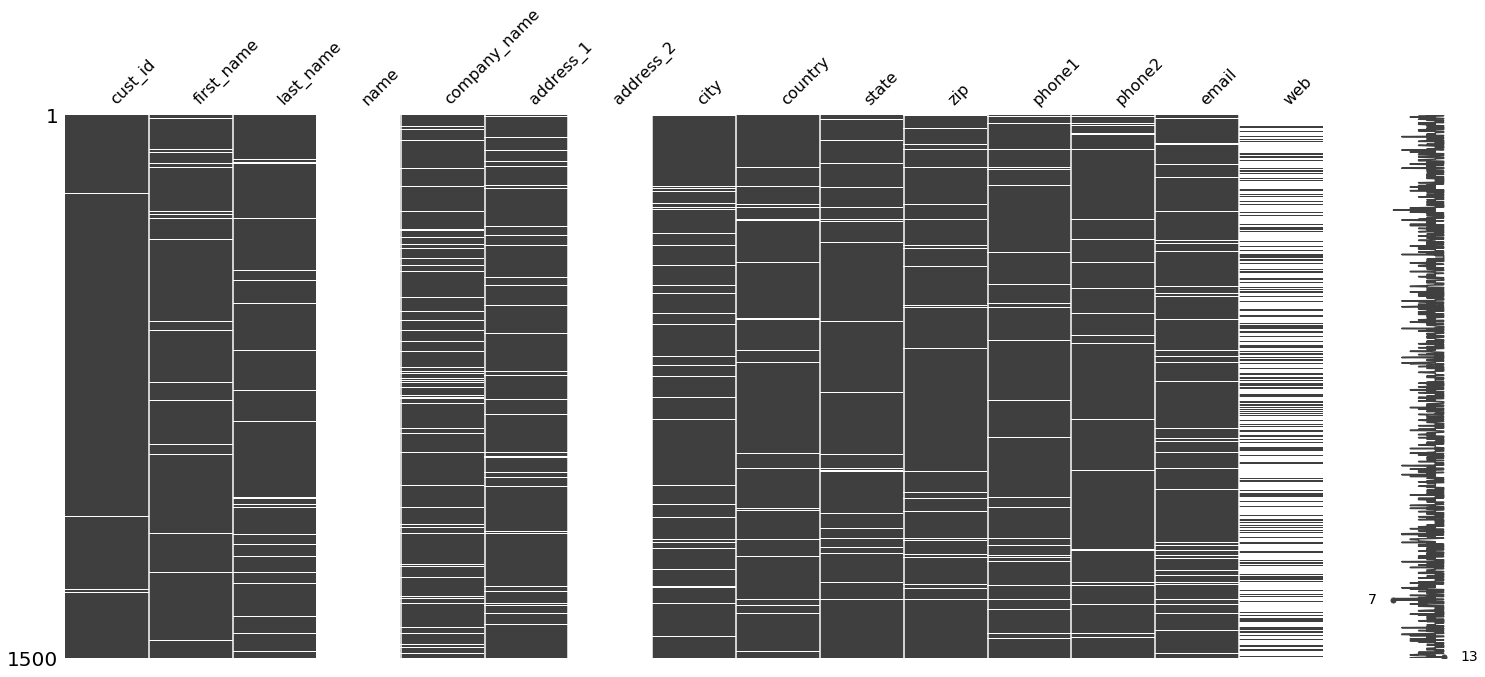

In [6]:
data = formatting(Datadf)

In [0]:
data.set_index('Attributes',inplace=True)
data = data.fillna(0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2882: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7faf5e50bb00>,
      dtype=object)

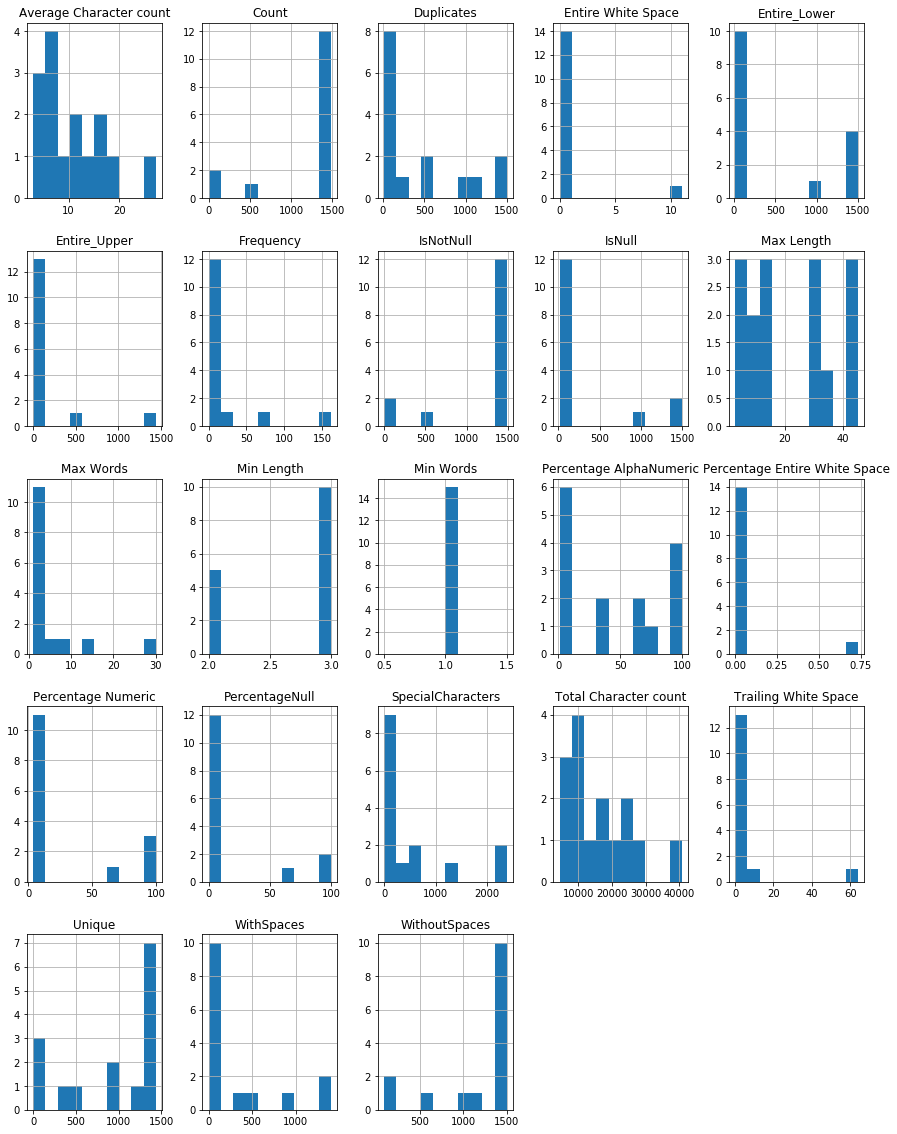

In [9]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.hist(ax = ax)

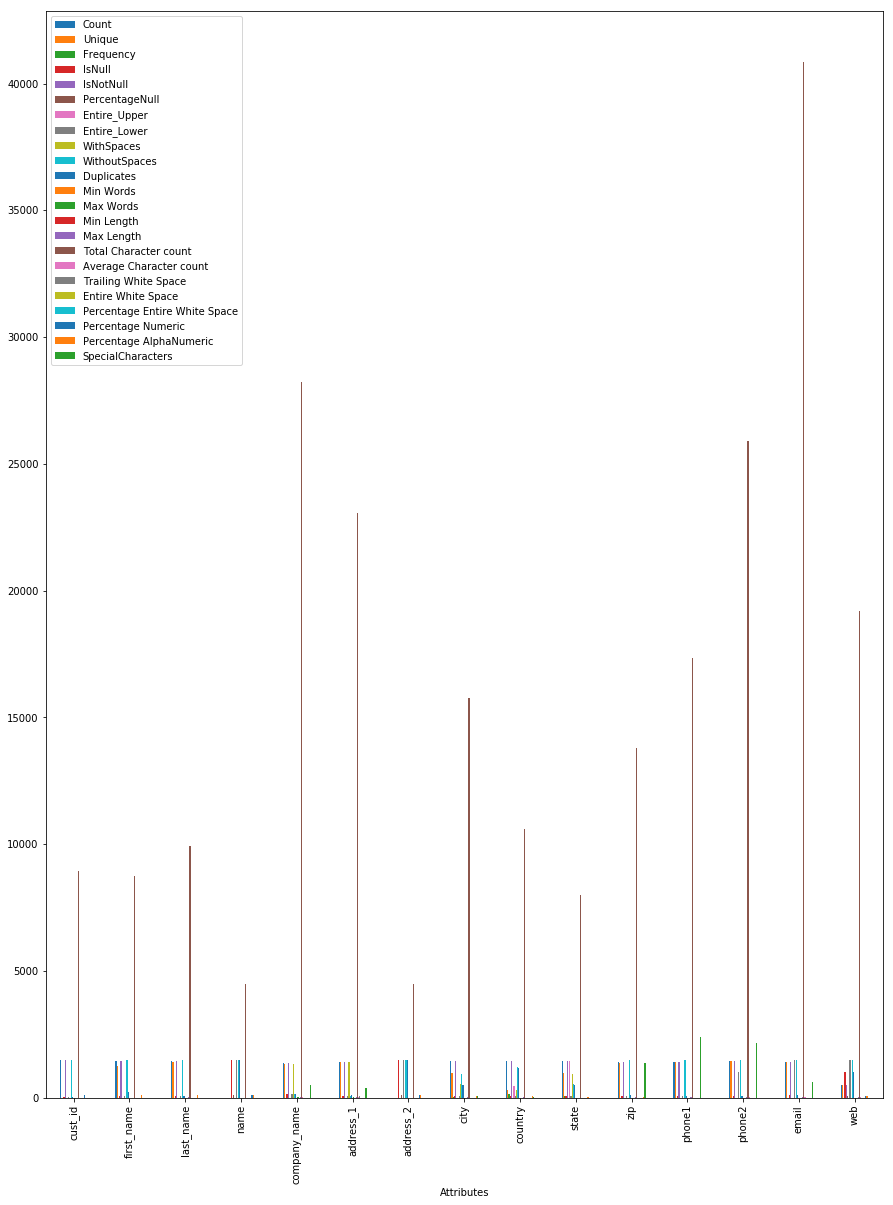

In [10]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
data.plot.bar(ax = ax)

In [0]:
columns = ['Count', 'Unique', 'Frequency', 'IsNull', 'IsNotNull',
       'PercentageNull', 'Entire_Upper', 'Entire_Lower', 'WithSpaces',
       'WithoutSpaces', 'Duplicates', 'Min Words', 'Max Words', 'Min Length',
       'Max Length', 'Total Character count', 'Average Character count',
       'Trailing White Space', 'Entire White Space',
       'Percentage Entire White Space', 'Percentage Numeric',
       'Percentage AlphaNumeric', 'SpecialCharacters']

([<matplotlib.patches.Wedge at 0x7faf5bf40cc0>,
 [Text(2.2, 0.0, 'cust_id'),
  Text(2.2, 0.0, 'first_name'),
  Text(2.2, 0.0, 'last_name'),
  Text(2.2, 0.0, 'name'),
  Text(2.1481779686261673, 0.47469086267712657, 'company_name'),
  Text(1.8213494261428858, 1.2339717451744923, 'address_1'),
  Text(1.6007218569963932, 1.5092016222274673, 'address_2'),
  Text(1.556766572961486, 1.5545024404322278, 'city'),
  Text(1.4961724706181991, 1.6129066737304534, 'country'),
  Text(1.480678307951383, 1.6271422028704898, 'state'),
  Text(0.35476859163039526, 2.1712068640257627, 'zip'),
  Text(-2.1699393396787383, 0.362440701514884, 'phone1'),
  Text(0.3376031161830754, -2.173942072812309, 'phone2'),
  Text(2.1268216850786343, -0.5626984271164084, 'email'),
  Text(2.1999999999999678, -3.765551150950968e-07, 'web')],
 [Text(1.2, 0.0, ' 0.0 %'),
  Text(1.2, 0.0, ' 0.0 %'),
  Text(1.2, 0.0, ' 0.0 %'),
  Text(1.2, 0.0, ' 0.0 %'),
  Text(1.1717334374324548, 0.25892228873297807, ' 6.9 %'),
  Text(0.9934633

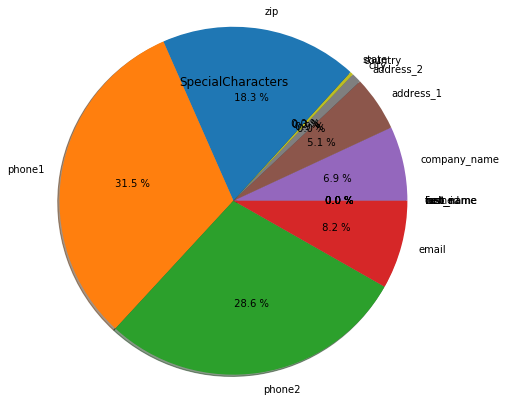

In [36]:
plt.title('SpecialCharacters')
plt.pie(data['SpecialCharacters'], labels = data.index ,autopct ='% 1.1f %%', shadow = True , radius = 2)


In [0]:
data.to_csv('ProfilingReports.csv') 
files.download('ProfilingReports.csv')

In [0]:
def PatternRecog(Datadf, data):
  pattern = []
  def change_char(s, p, r):
    return s[:p]+r+s[p+1:]
  
  for i in range(len(data)):
    if(data['Min Length'][i] - data['Max Length'][i] <= 9):
      pattern.append(data['Attributes'][i])
  
  Pattern = pd.DataFrame()
  Pattern = Datadf
  Pattern['column'] = ''
  Pattern['pattern'] = ''
  for patterncols in pattern:
    for j in range(len(Datadf)):
      a = str(Datadf.loc[Datadf.index[j] ,patterncols])
      for k in range(len(a)):
        if(a[k].isnumeric()):
          a = change_char(a, k, '9')
        if(a[k].isalpha()):
          a = change_char(a, k, 'A')
                    
      Pattern.loc[Pattern.index[j], 'column'] = Pattern.loc[Pattern.index[j], 'column'] + ' , ' + patterncols
      Pattern.loc[Pattern.index[j], 'pattern'] = Pattern.loc[Pattern.index[j], 'pattern'] + ' , ' + a
  
  for j in range(len(Datadf)):
    k = str(Pattern.loc[Pattern.index[j], 'column'])
    l = str(Pattern.loc[Pattern.index[j], 'pattern'])    
    Pattern.loc[Pattern.index[j], 'column'] = k[2:]
    Pattern.loc[Pattern.index[j], 'pattern'] = l[2:]
    
    new = Pattern['pattern'].str.split(' , ', n = 15, expand = True) 
    
  return new, pattern
         

In [0]:
Pattern, cols= PatternRecog(Datadf, data)
Pattern.columns = cols

In [0]:
Pattern.head()

,cust_id,first_name,last_name,name,company_name,address_1,address_2,city,country,state,zip,phone1,phone2,email,web
0,9999.9,AAAAA,AAAA,AAA,"AAAAAA, AAAA",9999 A AAAA AAA AA$$,AAA,AAA AAAAAAA,AAAAAAA,AA,99999,999-999-9999,999-999-9999,AAAAA@AAAAA.AAA,AAAA://AAA.AAAAAAAAAAAAA.AAA
1,9999.9,AAAAAAAAA,AAAAAAA,AAA,"AAAAAA, AAAAAAA A AAA",9 A AAAA AAAAA AAAA,AAA,AAAAAAAA,AAAAAAAAAA,AA,99999,999-999-9999,999-999-9999,AAAAAAAAA_AAAAAAA@AAAAAAA.AAA,AAAA://AAA.AAAAAAAAAAAAAAAAA.AAA
2,9999.9,AAA,AAAAAA,AAA,"AAAAAA, AAAAA A AAA",9 A AAAAAAAA AAA #99,AAA,AAAAAAAAAA,AAAAAAAAAA,AA999,9999,999-999-9999,999-999-9999,AAA@AAAAAA.AAA,AAAA://AAA.AAAAAAAAAAAAAAA.AAA
3,9999.9,AAAAA,AAAAAAAA,AAA,AAAAA AAAAAAAA AAAAAAA,999 AAAA AA$$,AAA,AAAAAAAAA,AAAAAAAAA,AA,99999,999-999-9999,999-999-9999,AAAAAAAAA@AAAAAAA.AAA,AAAA://AAA.AAAAAAAAAAAAAAAAAAAA.AAA
4,9999.9,AAAAAAA,AAAAAA,AAA,AAAAAAAA AAAAAAAAAA,99 AAAAAA AA,AAA,AAAAAAAA,AAAAAA,AA,99999,999-999-9999,999-999-9999,AAAAAAA.AAAAAA@AAA.AAA,AAAA://AAA.AAAAAAAAAAAAAAAAAA.AAA


In [0]:
Pattern.describe(include = 'all')

In [0]:
for column in Pattern.columns:
  countpattern = Pattern.groupby([column]).count()
  countpattern.to_csv('countpattern.csv') 
  files.download('countpattern.csv')

In [0]:
countpattern.to_csv('countpattern.csv') 
files.download('countpattern.csv')

In [0]:
def ColumnDefine(columns):
  from fuzzywuzzy import fuzz
  
  ad_columns = ['Address', 'Address1', 'Address2', 'Address3', 'City', 'Country', 'State', 'Zip', 'Postal_Code']
  contact_columns = ['Phone1', 'Phone2', 'email', 'Web']
  Primary_keys = ['CustomerID', 'CustID', 'Cust_id', 'ID', 'First_Name', 'Last_Name', 'Name', 'Company_Name']
  String_Columns = ['Address', 'Address1', 'Address2', 'Address3', 'City', 'Country', 'State', 'email', 'Web', 'First_Name', 'Last_Name', 'Name', 'Company_Name']

  Address = []
  Contact = []
  Primary = []
  StrCol = []

  for i in range(len(columns)):
    for j in range(len(ad_columns)):
      if(fuzz.ratio(columns[i],ad_columns[j])>=65):
        Address.append(columns[i])
      
  for i in range(len(columns)):
    for j in range(len(contact_columns)):
      if(fuzz.ratio(columns[i],contact_columns[j])>=65):
        Contact.append(columns[i])

  for i in range(len(columns)):
    for j in range(len(Primary_keys)):
      if(fuzz.ratio(columns[i],Primary_keys[j])>=65):
        Primary.append(columns[i])
        
  for i in range(len(columns)):
    for j in range(len(String_Columns)):
      if(fuzz.ratio(columns[i],String_Columns[j])>=65):
        StrCol.append(columns[i])

  def Remove(duplicate): 
    final_list = [] 
    for num in duplicate: 
      if num not in final_list: 
        final_list.append(num) 
    return final_list 
  
  Address = Remove(Address)
  Contact = Remove(Contact)
  Primary = Remove(Primary)
  StrCol = Remove(StrCol)
  
  return Address, Contact, Primary, StrCol

In [0]:
Address, Contact, Primary, StrCol = ColumnDefine(columns)

In [0]:
import numbers
import decimal
Datadf['Cleansed'] = 'Yes'

for column in StrCol:
  for i in range(len(Datadf)):
    a = str(Datadf.loc[Datadf.index[i], column])
    if(isinstance(Datadf.loc[Datadf.index[i], column], numbers.Number) and a!= 'nan'):
      Datadf.loc[Datadf.index[i], column] = DataMaster.loc[DataMaster.index[i], column]
      Datadf.loc[Datadf.index[i], 'Cleansed'] = Datadf.loc[Datadf.index[i], 'Cleansed'] + ' '+ column + 'is numeric'
          
for column in columns:
  for i in range(len(Datadf)):
    a = str(Datadf.loc[Datadf.index[i], column])
    if(a == 'nan'):
      Datadf.loc[Datadf.index[i], column] = DataMaster.loc[DataMaster.index[i], column]
      Datadf.loc[Datadf.index[i], 'Cleansed'] = Datadf.loc[Datadf.index[i], 'Cleansed'] + ' ' + column +  'Inserted Missing'
      
import re
a1 = ''
  
for column in columns:
  for i in range(len(Datadf)):
    a = str(Datadf.loc[Datadf.index[i], column])
    if(a != 'nan'):
      for k in a.split("\n"):
        a1 = str(a1) + re.sub(r"[^a-zA-Z0-9]+", ' ', k)
      Datadf.loc[Datadf.index[i], column] = a1
      a1 = ''

In [0]:
def Clean(Datadf):
  Datadf['Flag'] = ''
  Datadf['Cleansed'] = 'Yes'
  
  for i in range(len(Address)):
    if(fuzz.ratio(Address[i],'Country')>=65):
      COUNTRY_CODE = Address[i]
    
  from iso3166 import countries
  for i in range(len(Datadf)): 
    if(len(str(Datadf.loc[Datadf.index[i], COUNTRY_CODE]))==2):
      Datadf.loc[Datadf.index[i], COUNTRY_CODE] = countries.get(Datadf.loc[Datadf.index[i], COUNTRY_CODE])[0]
      
  import re
  a1 = ''
  
  for column in columns:
    for i in range(len(Datadf)):
      a = str(Datadf[column][i])
      if(a != 'nan'):
        for k in a.split("\n"):
          a1 = str(a1) + re.sub(r"[^a-zA-Z0-9]+", ' ', k)
        Datadf[column][i] = a1
        a1 = ''
   
  import numbers
  import decimal
  for column in StrCol:
    for i in range(len(Datadf)):
      if(isinstance(Datadf[column][i], numbers.Number)): 
        Datadf[column][i] = DataMaster[column][i]
        Datadf['Flag'][i] = Datadf['Flag'][i] + Column + 'is numeric'
         
          
  for column in columns:
    for i in range(len(Datadf)):
      a = str(Datadf[column][i])
      if(a == 'nan'):
        Datadf[column][i] = DataMaster[column][i]
        Datadf['Cleansed'] = Datadf['Cleansed'] + 'Inserted Missing'    

In [0]:
Datadf.head()

,cust_id,first_name,last_name,name,company_name,address_1,address_2,city,country,state,zip,phone1,phone2,email,web,Cleansed
0,1001 0,James,Butt,,Benton John,6649 N Blue Gum St,,New Orleans,Orleans,LA,70116,504 621 8927,504 845 1427,jbutt gmail com,http www bentonjohnbjr com,Yes
1,1002 0,Josephine,Darakjy,,Chanay Jeffrey A Esq,4 B Blue Ridge Blvd,,Brighton,Livingston,MI,48116,810 292 9388,810 374 9840,josephine darakjy darakjy org,http www chanayjeffreyaesq com,Yes
2,1003 0,Art,Venere,,Chemel James L Cpa,8 W Cerritos Ave 54,,Bridgeport,Gloucester,NJ476,8014,856 636 8749,856 264 4130,art venere org,http www chemeljameslcpa com,Yes
3,1004 0,Lenna,Paprocki,,Feltz Printing Service,639 Main St,,Anchorage,Anchorage,AK,99501,907 385 4412,907 921 2010,lpaprocki hotmail com,http www feltzprintingservice com,Yes
4,1005 0,Donette,Foller,,Printing Dimensions,34 Center St,,Hamilton,Butler,OH,45011,513 570 1893,513 549 4561,donette foller cox net,http www printingdimensions com,Yes


In [0]:
def Standard(Address, Contact, Primary):
  from fuzzywuzzy import fuzz
  l = len(Address)
  columns = Address[-l+1:]
  df = pd.DataFrame()
  df['Address'] = Datadf[Address[0]]
  for i in range(len(Datadf)):
    s = str(Datadf[Address[0]][i])
    if(s != 'nan'):
      a = s
    for column in columns:
      l = Datadf[column][i]
      k = str(l)
      if(k != 'nan'):
        a = str(a) + ',' + k
    df.loc[df.index[i], 'Address'] = a
    a = ''

  l1 = len(Contact)
  columns = Contact[-l1+1:]
  df['Contact'] = Datadf[Contact[0]]
  for i in range(len(Datadf)):
    s = str(Datadf[Contact[0]][i])
    if(s != 'nan'):
      a1 = s
    for column in columns:
      l = Datadf[column][i]
      k = str(l)
      if(k != 'nan'):
        a1 = str(a1) + ',' + k
    df.loc[df.index[i], 'Contact'] = a1
    a1 = ''
 
  df['Name'] = ''
  for i in range(len(Primary)):
    if(fuzz.ratio(Primary[i],'First_Name')>=70):
      FN = Primary[i]
    if(fuzz.ratio(Primary[i],'Last_Name')>=70):
      LN = Primary[i]
 
  df['Name'] = Datadf[FN] +' '+ Datadf[LN]
  df['Cleansed'] = Datadf['Cleansed']
  
  for i in range(len(Primary)):
    if(fuzz.ratio(Primary[i],'Cust_ID')>=50):
      df['Cust_ID'] = Datadf[Primary[i]]
    if(fuzz.ratio(Primary[i],'Company_Name')>=50):
      df['Company_Name'] = Datadf[Primary[i]]
      
  for i in range(len(df)):
    df['Cust_ID'][i] = df['Cust_ID'][i][:-2]     
  
  return df


In [0]:
df = Standard(Address, Contact, Primary)

In [0]:
df.to_csv('Cleansed+Reports.csv') 
files.download('Cleansed+Reports.csv')